In [1]:
import xarray as xr
import datetime
import os
from glob import glob
import matplotlib.pyplot as plt
from cmocean import cm
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib import axes
import datetime as dt
import pandas as pd

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
path_eke_10 = '/scratch/usr/shkifmmp/master/data/ORION10/EKE/'
path_eke_10X = '/scratch/usr/shkifmmp/master/data/ORION10X/EKE/'

# mask
mask_10 = xr.open_dataset('/scratch/usr/shkifmjr/NUSERDATA/ORION/10-data/meshmask/1_mesh_mask.nc', chunks={"y":100, "x":100}).tmask.isel(z=0).squeeze()

mask_10X = xr.open_dataset('/scratch/usr/shkmazel/masks/ORION10Xnospongeinocean/1_mesh_mask.nc', chunks={"y":100, "x":100}).tmask.isel(z=0).squeeze()

mask_acc = xr.open_dataset('/scratch/usr/shkifmmp/master/data/ORION10/mask/mask_nest_int_2d.nc', chunks={"y":100, "x":100})

mask_10_base = xr.open_dataset('/scratch/usr/shkifmjr/NUSERDATA/ORION/10-data/meshmask/mesh_mask.nc', chunks={"y":100, "x":100}).tmask.isel(z=0).squeeze()
mask_10X_base = xr.open_dataset('/scratch/usr/shkmazel/masks/ORION10Xnospongeinocean/mesh_mask.nc', chunks={"y":100, "x":100}).tmask.isel(z=0).squeeze()

In [4]:
#changing to ones and zeros
mask_plot = mask_acc.mask_nest.where(mask_acc.mask_nest ==0, other=1)

In [5]:
eke_10 = xr.open_mfdataset(paths = sorted(glob(path_eke_10 + 'nest/1_OR*EKE*.nc')), 
                             chunks={"y":100, "x":100}).vozocrtx.squeeze().where(mask_10)

In [6]:
eke_10X = xr.open_mfdataset(paths = sorted(glob(path_eke_10X + '1_FO*EKE*.nc')), 
                             chunks={"y":100, "x":100}).vozocrtx.squeeze().where(mask_10X)

In [7]:
eke_10X = eke_10X.where((eke_10X.nav_lat < -29.675) & (eke_10X.nav_lat > -68.02), drop=True )

In [8]:
e1t_O = xr.open_dataset('/scratch/usr/shkifmjr/NUSERDATA/ORION/10-data/meshmask/1_mesh_mask.nc', chunks={"y":100, "x":100}).e1t.isel(t=0).squeeze()
e2t_O = xr.open_dataset('/scratch/usr/shkifmjr/NUSERDATA/ORION/10-data/meshmask/1_mesh_mask.nc', chunks={"y":100, "x":100}).e2t.isel(t=0).squeeze()

e1t_X = xr.open_dataset('/scratch/usr/shkmazel/masks/ORION10Xnospongeinocean/1_mesh_mask.nc', chunks={"y":100, "x":100}).e1t.isel(t=0).squeeze()
e2t_X = xr.open_dataset('/scratch/usr/shkmazel/masks/ORION10Xnospongeinocean/1_mesh_mask.nc', chunks={"y":100, "x":100}).e2t.isel(t=0).squeeze()

In [21]:
# nav_lat_X = xr.open_dataset('/scratch/usr/shkmazel/masks/ORION10Xnospongeinocean/1_mesh_mask.nc', chunks={"y":100, "x":100}).nav_lat

In [72]:
# nav_lat_X.isel(y=slice(296,923))[-1,0].values

array(-29.763361, dtype=float32)

In [9]:
def weighted_mean(variable, weight, mask):
    variable = variable.where(mask)
    weight = weight.where(mask)
    return (variable * weight).sum(('x','y')) / weight.sum(('x','y'))

In [10]:
area_O = (e1t_O * e2t_O).isel(y=slice(1,-1),x=slice(1,-1))
area_X = (e1t_X * e2t_X).isel(y=slice(296,923), x=slice(1,-1))

In [11]:
mask_plot = mask_plot.where(mask_plot.nav_lat >= -65, other=0)

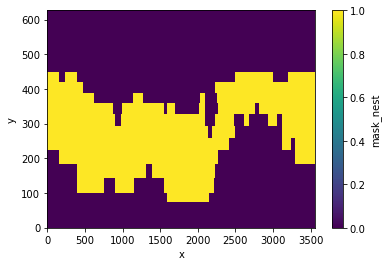

In [12]:
mask_plot.plot()

In [12]:
eke_10_mean = weighted_mean(eke_10.isel(y=slice(1,-1),x=slice(1,-1)), area_O, mask_plot).compute()

In [13]:
eke_10X_mean = weighted_mean(eke_10X.isel(y=slice(1,-1), x=slice(1,-1)), area_X, mask_plot).compute()

In [79]:
eke_10X_mean.sel(time_counter=slice('1998','2017')).mean() *1e4 /eke_10_mean.sel(time_counter=slice('1998','2017')).mean() *1e4

<xarray.DataArray ()>
array(1.31543321e+08)
Coordinates:
    depthu   float32 93.59

In [201]:
(eke_10X_mean*1e4)

<xarray.DataArray (time_counter: 60)>
array([135.3014263 , 134.68481076, 134.2025442 , 135.99187785,
       142.08987016, 140.89116675, 142.59886589, 143.60529511,
       136.03824802, 144.79022651, 142.68543556, 141.60309592,
       143.75678629, 146.14162603, 152.30084756, 145.32331642,
       146.6798259 , 144.97834846, 151.80139173, 152.16799363,
       153.32413528, 151.47109209, 147.85011527, 144.82717855,
       150.51998967, 148.04774715, 155.04659534, 154.64761703,
       149.1027218 , 158.56601663, 158.69271635, 152.94452347,
       155.03228112, 148.7820867 , 151.41868111, 151.32160776,
       143.86069986, 142.04020306, 150.09788689, 153.64765437,
       151.5311443 , 155.36460556, 147.77500968, 147.7798226 ,
       146.05611617, 142.93388926, 142.52522325, 145.42672462,
       147.45380024, 157.86895023, 150.47986768, 149.51869983,
       157.66337049, 149.96498308, 146.22485548, 147.60822813,
       146.30602086, 144.15018822, 148.48824228, 146.90082777])
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1958-07-02T12:00:00 ... 2017-...
    depthu        float32 93.59

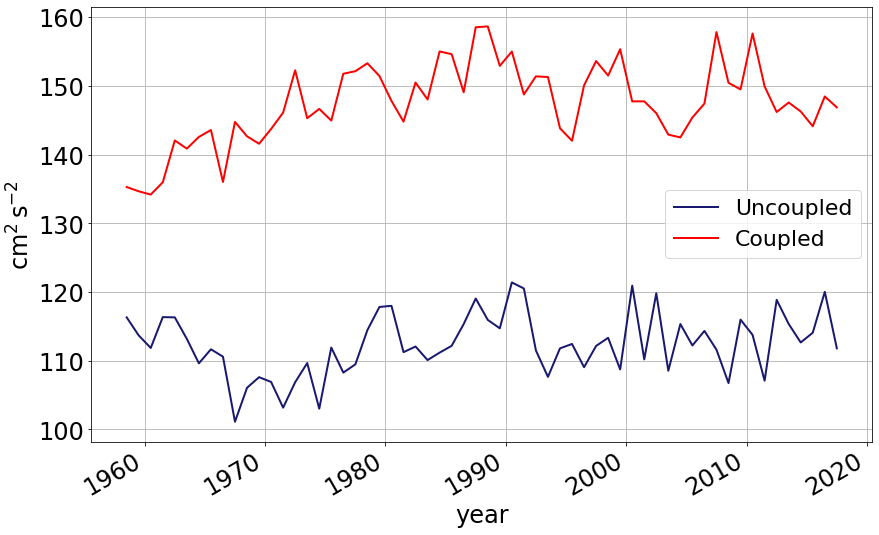

In [25]:
fig, axs = plt.subplots(figsize=(14,8))

(eke_10_mean*1e4).plot(ax=axs, label='Uncoupled', color='midnightblue', linewidth=2)
(eke_10X_mean*1e4).plot(ax=axs, label= 'Coupled', color='red', linewidth=2)

# axs.axvline(x=dt.datetime(1978,7,1), color='k', linestyle='--', linewidth=2)
# axs.axvline(x=dt.datetime(1998,7,1), color='k', linestyle='--', linewidth=2)
axs.set_title(None)
axs.tick_params(axis= 'x', labelsize= 24)
axs.tick_params(axis= 'y', labelsize= 24)
axs.set_xlabel('year', fontsize=24)
# axs.set_ylabel('EKE at 100m (cm$^{2}\,$s$^{-2}$)', fontsize=24)
axs.set_ylabel('cm$^{2}\,$s$^{-2}$', fontsize=24)
axs.grid()

plt.legend(fontsize=22)

save_path = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/master/figures/'
plt.savefig(save_path + 'eke_timeseries_models_diffylabel.png', format='png', facecolor="w",  bbox_inches='tight')

### checking lat for calculating drake passages transport in foci

In [3]:
eke_10 = xr.open_mfdataset(paths = sorted(glob(path_eke_10 + 'nest/1_OR*EKE*.nc'))[0], 
                             chunks={"y":100, "x":100}).vozocrtx.squeeze()

In [4]:
eke_10X = xr.open_mfdataset(paths = sorted(glob(path_eke_10X + '1_FO*EKE*.nc'))[0], 
                             chunks={"y":100, "x":100}).vozocrtx.squeeze()

In [ ]:
# 2165,2165,40,270

In [35]:
np.where((eke_10X.nav_lat <= -55.43) & (eke_10X.nav_lat >= -66.5))[0]

array([335, 335, 335, ..., 565, 565, 565])

In [36]:
eke_10X.nav_lat.isel(y=565).values

array([-55.437656, -55.437656, -55.437656, ..., -55.437656, -55.437656,
       -55.437656], dtype=float32)

In [ ]:
eke_10X.nav_lon.isel(x=2165).values

drake passage transport

In [26]:
path_drake = '/scratch/usr/shkifmmp/master/data/ORION10X/drake_transp/'
path_drake_OR = '/scratch/usr/shklvn09/SCRATCH/ORION10.L46.LIM2vp.CFCSF6.MOPS.JRA.XIOS2.5.LP01-EXP05/OUT/Drake/'

In [27]:
drake_FO = xr.open_mfdataset(sorted(glob(path_drake + '1_F*transports.nc'))).vtrp.squeeze()

In [28]:
drake_OR = xr.open_mfdataset(sorted(glob(path_drake_OR + '1_O*1958*2017*transports.nc'))).vtrp.squeeze()

In [69]:
# drake_OR.plot(color='r')
(drake_FO.mean()/drake_OR.mean()).values

array(1.2915765, dtype=float32)

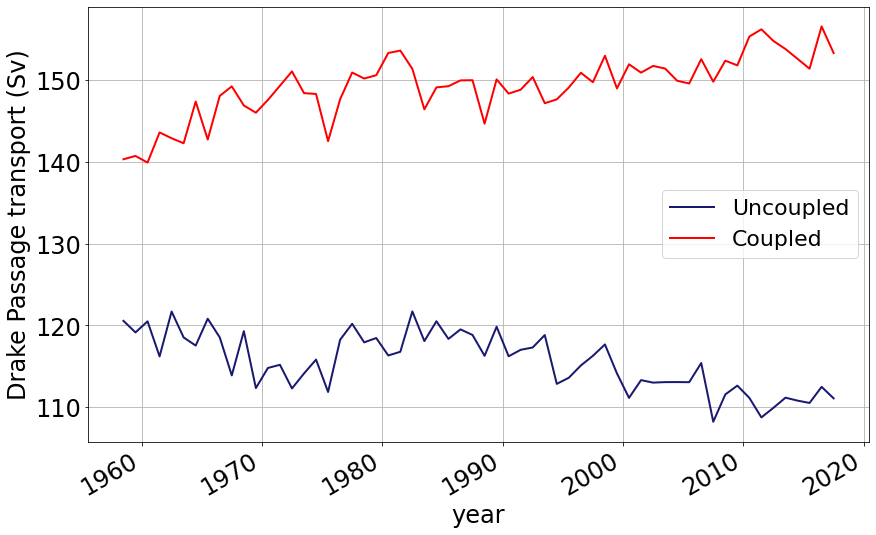

In [40]:
fig, axs = plt.subplots(figsize=(14,8))

drake_OR.plot(ax=axs, label='Uncoupled', color='midnightblue', linewidth=2)
drake_FO.plot(ax=axs, label= 'Coupled', color='red', linewidth=2)

# axs.axvline(x=dt.datetime(1978,7,1), color='k', linestyle='--', linewidth=2)
# axs.axvline(x=dt.datetime(1998,7,1), color='k', linestyle='--', linewidth=2)
axs.set_title(None)
axs.tick_params(axis= 'x', labelsize= 24)
axs.tick_params(axis= 'y', labelsize= 24)
# axs.set_xlabel(None)
axs.set_ylabel('Drake Passage transport (Sv)', fontsize=24)
# axs.set_ylabel('Sv', fontsize=24)
axs.grid()
axs.set_xlabel('year', fontsize=24)


plt.legend(fontsize=22)
# plt.title('a)', loc='left', fontsize=22)

save_path = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/master/figures/'
plt.savefig(save_path + 'acc_drake_timeseries_models.png', format='png', facecolor="w",  bbox_inches='tight')

### checking seasonality of velocities

In [41]:
u_FO = xr.open_mfdataset(sorted(glob('/scratch/usr/shkifmmp/master/data/ORION10X/EKE/1_FO*grid_U_k10.nc'))).vozocrtx.squeeze()
v_FO = xr.open_mfdataset(sorted(glob('/scratch/usr/shkifmmp/master/data/ORION10X/EKE/1_FO*grid_V_k10.nc'))).vomecrty.squeeze()

In [42]:
u_OR = xr.open_mfdataset(sorted(glob('/scratch/usr/shkifmmp/master/data/ORION10/EKE/velocities_nest/1_OR*grid_U_k10.nc'))).vozocrtx.sel(time_counter=slice('1998','2017')).squeeze()
v_OR = xr.open_mfdataset(sorted(glob('/scratch/usr/shkifmmp/master/data/ORION10/EKE/velocities_nest/1_OR*grid_V_k10.nc'))).vomecrty.sel(time_counter=slice('1998','2017')).squeeze()

In [43]:
sea_u_FO = u_FO.groupby('time_counter.month').mean()
sea_v_FO = v_FO.groupby('time_counter.month').mean()
sea_u_OR = u_OR.groupby('time_counter.month').mean()
sea_v_OR = v_OR.groupby('time_counter.month').mean()

In [44]:
sea_u_FO_std = u_FO.groupby('time_counter.month').std()
sea_v_FO_std = v_FO.groupby('time_counter.month').std()
sea_u_OR_std = u_OR.groupby('time_counter.month').std()
sea_v_OR_std = v_OR.groupby('time_counter.month').std()

In [45]:
sea_v_FO = sea_v_FO.isel(y=slice(295,924))
sea_u_FO = sea_u_FO.isel(y=slice(295,924))

In [46]:
sea_v_FO_std = sea_v_FO_std.isel(y=slice(295,924))
sea_u_FO_std = sea_u_FO_std.isel(y=slice(295,924))

In [ ]:
# sea_u_FO.nav_lat.isel(x=0,y=slice(295,924)).values

In [ ]:
# np.where((sea_v_FO.nav_lat >= -68.0014) & (sea_v_FO.nav_lat<=-29.633061))[0]

In [47]:
u_OR_mean = weighted_mean(sea_u_OR.isel(y=slice(1,-1),x=slice(1,-1)), area_O, mask_plot).compute()

v_OR_mean = weighted_mean(sea_v_OR.isel(y=slice(1,-1),x=slice(1,-1)), area_O, mask_plot).compute()

u_FO_mean = weighted_mean(sea_u_FO.isel(y=slice(1,-1),x=slice(1,-1)), area_X, mask_plot).compute()

v_FO_mean = weighted_mean(sea_v_FO.isel(y=slice(1,-1),x=slice(1,-1)), area_X, mask_plot).compute()

In [48]:
u_OR_std = weighted_mean(sea_u_OR_std.isel(y=slice(1,-1),x=slice(1,-1)), area_O, mask_plot).compute()

v_OR_std = weighted_mean(sea_v_OR_std.isel(y=slice(1,-1),x=slice(1,-1)), area_O, mask_plot).compute()

u_FO_std = weighted_mean(sea_u_FO_std.isel(y=slice(1,-1),x=slice(1,-1)), area_X, mask_plot).compute()

v_FO_std = weighted_mean(sea_v_FO_std.isel(y=slice(1,-1),x=slice(1,-1)), area_X, mask_plot).compute()

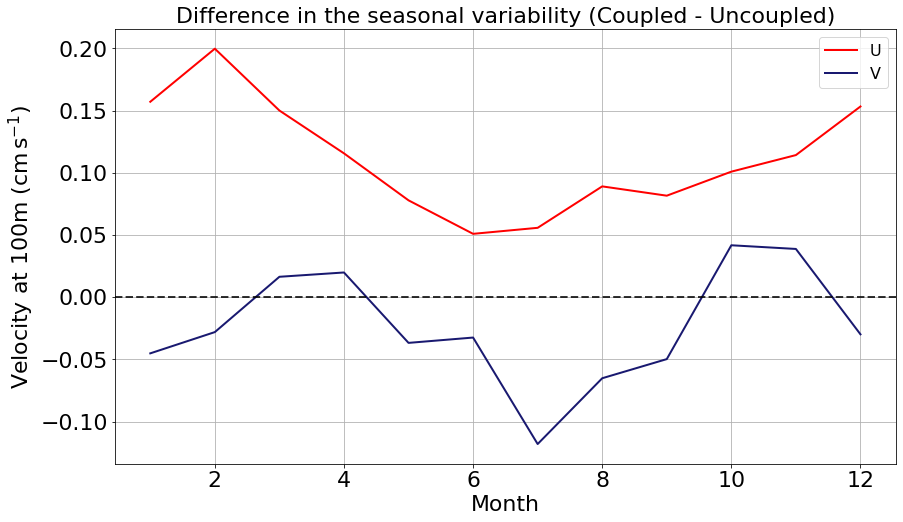

In [33]:
# fig, axs = plt.subplots(figsize=(14,8))

# ((u_FO_mean*1e2) - (u_OR_mean*1e2)).plot(ax=axs, label='U', color='red', linewidth=2)
# ((v_FO_mean*1e2) - (v_OR_mean*1e2)).plot(ax=axs, label='V', color='midnightblue', linewidth=2)
# # (u_FO_mean*1e2).plot(ax=axs, label= 'Coupled', color='red', linewidth=2)

# axs.axhline(y=0, color='k', linestyle='--', linewidth=2, alpha=0.8)
# axs.fill_between()
# axs.tick_params(axis= 'x', labelsize= 22)
# axs.tick_params(axis= 'y', labelsize= 22)
# axs.set_xlabel('Month', fontsize=22)
# axs.set_ylabel('Velocity at 100m (cm$\,$s$^{-1}$)', fontsize=22)
# axs.grid()
# axs.set_title('Difference in the seasonal variability (Coupled - Uncoupled)', fontsize=22)
# plt.legend(fontsize=22)
# # axs.set_ylim(bottom=0)
# # plt.title('a)', loc='left', fontsize=22)

# save_path = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/master/figures/'
# plt.savefig(save_path + 'u_k10_season_models_diff_monthly.png', format='png', facecolor="w",  bbox_inches='tight')

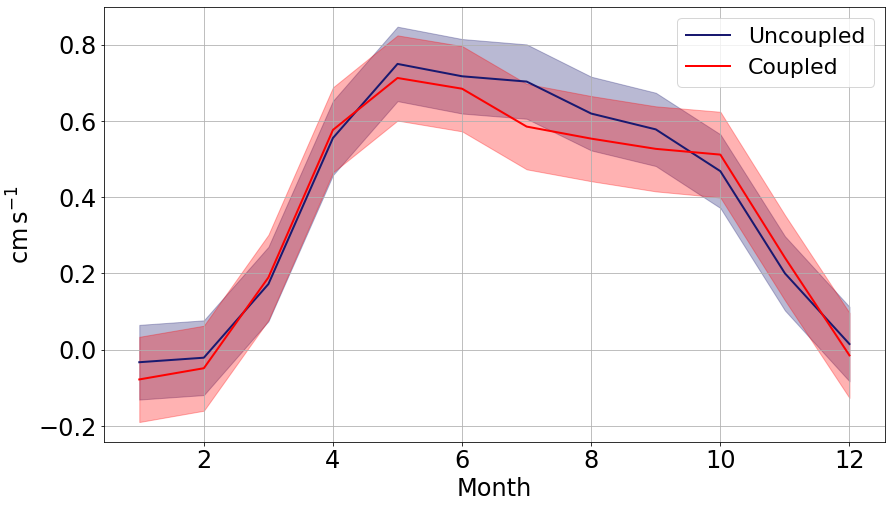

In [51]:
fig, axs = plt.subplots(figsize=(14,8))

(v_OR_mean*1e2).plot(ax=axs, label= 'Uncoupled', color='midnightblue', linewidth=2)
(v_FO_mean*1e2).plot(ax=axs, label= 'Coupled', color='red', linewidth=2)

axs.fill_between(x=v_OR_std.month, y1=((v_OR_mean*1e2) - v_OR_std), y2=((v_OR_mean*1e2) + v_OR_std),alpha=0.3, color='midnightblue')
axs.fill_between(x=v_FO_std.month, y1=((v_FO_mean*1e2) - v_FO_std), y2=((v_FO_mean*1e2) + v_FO_std),alpha=0.3, color='r')


axs.tick_params(axis= 'x', labelsize= 24)
axs.tick_params(axis= 'y', labelsize= 24)
# axs.set_xlabel('Days of the year', fontsize=22)
# axs.set_ylabel('V at 100m (cm$\,$s$^{-1}$)', fontsize=24)
axs.set_ylabel('cm$\,$s$^{-1}$', fontsize=24)

axs.grid()
axs.set_title(None)
plt.legend(fontsize=22)
axs.set_xlabel('Month', fontsize=24)
# plt.title('a)', loc='left', fontsize=22)

save_path = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/master/figures/'
plt.savefig(save_path + 'v_k10_season_models_mothly_std_diffylabel.png', format='png', facecolor="w",  bbox_inches='tight')

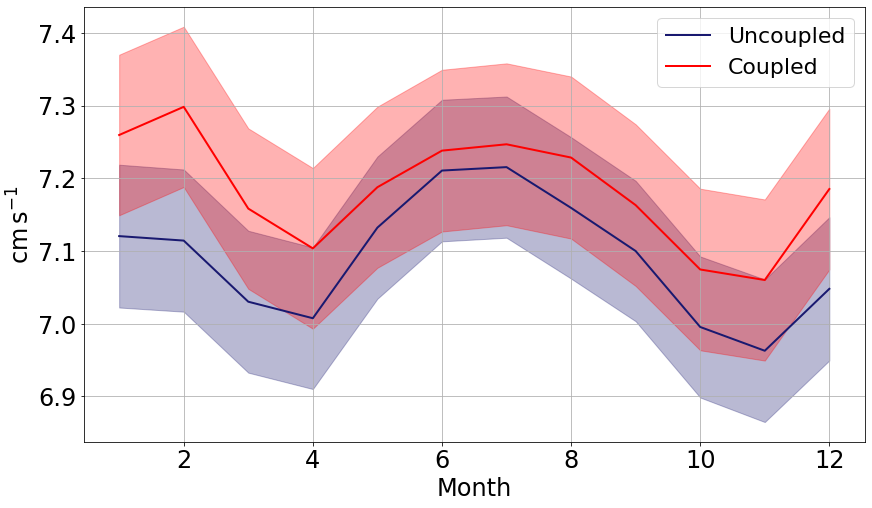

In [54]:
fig, axs = plt.subplots(figsize=(14,8))

(u_OR_mean*1e2).plot(ax=axs, label= 'Uncoupled', color='midnightblue', linewidth=2)
(u_FO_mean*1e2).plot(ax=axs, label= 'Coupled', color='red', linewidth=2)

axs.fill_between(x=u_OR_std.month, y1=((u_OR_mean*1e2) - u_OR_std), y2=((u_OR_mean*1e2) + u_OR_std),alpha=0.3, color='midnightblue')
axs.fill_between(x=u_FO_std.month, y1=((u_FO_mean*1e2) - u_FO_std), y2=((u_FO_mean*1e2) + u_FO_std),alpha=0.3, color='r')

axs.tick_params(axis= 'x', labelsize= 24)
axs.tick_params(axis= 'y', labelsize= 24)
axs.set_xlabel('Month', fontsize=24)
# axs.set_ylabel('U at 100m (cm$\,$s$^{-1}$)', fontsize=24)
axs.set_ylabel('cm$\,$s$^{-1}$', fontsize=24)

axs.grid()
axs.set_title(None)
plt.legend(fontsize=22)
# plt.title('a)', loc='left', fontsize=22)

save_path = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/master/figures/'
plt.savefig(save_path + 'u_k10_season_models_monthly_std_diffylabel.png', format='png', facecolor="w",  bbox_inches='tight')

### wind stress and speed

In [55]:
path_X = '/scratch/usr/shktorge/models/FOCI_PalMod2_ORION10X/experiments/FOCI2.0-TM041/outdata/nemo/'
path = '/scratch/usr/shklvn09/SCRATCH/ORION10.L46.LIM2vp.CFCSF6.MOPS.JRA.XIOS2.5.LP01-EXP05/OUT/'
path_wspeed_OR = '/scratch/usr/shkifmjr/NDATA/forcing/JRA55-do_drowned/data/'

### wind speed

### ORION10

In [56]:
vspeed_OR_98 = xr.open_mfdataset(sorted(glob(path_wspeed_OR + 'vas-drowned_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-4-0_gr_y199[89]*.nc'))+
                                sorted(glob(path_wspeed_OR + 'vas-drowned_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-4-0_gr_y2*.nc'))[0:-2]).vas

In [57]:
uspeed_OR_98 = xr.open_mfdataset(sorted(glob(path_wspeed_OR + 'uas-drowned_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-4-0_gr_y199[89]*.nc'))+
                                sorted(glob(path_wspeed_OR + 'uas-drowned_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-4-0_gr_y2*.nc'))[0:-2]).uas

In [58]:
vspeed_OR_98 = vspeed_OR_98.sel(lat=slice(None,0)) #until equator

In [59]:
uspeed_OR_98 = uspeed_OR_98.sel(lat=slice(None,0))

In [60]:
wspeed_OR_98 = np.abs(np.sqrt(uspeed_OR_98**2 + vspeed_OR_98**2))

In [132]:
np.where((wspeed_OR_98.lat >= -65) & (wspeed_OR_98.lat <= -37))[0]

array([44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93])

In [134]:
wspeed_OR_98.isel(lat=slice(44,94))

<xarray.DataArray (time: 58440, lat: 50, lon: 640)>
dask.array<getitem, shape=(58440, 50, 640), dtype=float32, chunksize=(2928, 50, 640), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 0.0 0.5625 1.125 1.688 ... 357.8 358.3 358.9 359.4
  * lat      (lat) float64 -64.87 -64.31 -63.74 -63.18 ... -38.47 -37.91 -37.35
  * time     (time) float64 3.579e+04 3.579e+04 3.579e+04 ... 4.31e+04 4.31e+04

In [142]:
area_O_wsp_t = xr.Dataset(data_vars=dict(
        area=(['lat','lon'], area_O_wsp)))

In [143]:
area_O_wsp_t

<xarray.Dataset>
Dimensions:  (lat: 160, lon: 640)
Dimensions without coordinates: lat, lon
Data variables:
    area     (lat, lon) float64 0.3133 0.3133 0.3133 ... 0.3159 0.3159 0.3159

In [170]:
def weighted_mean_adapt(variable, weight):#, mask):
    variable = variable#.where(mask)
    weight = weight#.where(mask)
    return (variable * weight).sum(('x','y')) / weight.sum(('x','y'))

In [151]:
wspeed_OR_98_wm = weighted_mean_adapt(wspeed_OR_98.sel(lat=slice(-65,-37)),area_O_wsp_t.isel(lat=slice(44,94))).compute()

In [ ]:
wspeed_OR_98_wm = weighted_mean_adapt(wspeed_OR_98.sel(lat=slice(-65,-37)),area_O_wsp_t.isel(lat=slice(44,94))).compute()

In [175]:
wspeed_OR_98_wm.mean()/ wspeed_ts.mean()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    area     float64 1.027

In [131]:
wspeed_OR_98.sel(lat=slice(-65,-37))

<xarray.DataArray (time: 58440, lat: 50, lon: 640)>
dask.array<getitem, shape=(58440, 50, 640), dtype=float32, chunksize=(2928, 50, 640), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 0.0 0.5625 1.125 1.688 ... 357.8 358.3 358.9 359.4
  * lat      (lat) float64 -64.87 -64.31 -63.74 -63.18 ... -38.47 -37.91 -37.35
  * time     (time) float64 3.579e+04 3.579e+04 3.579e+04 ... 4.31e+04 4.31e+04

In [108]:
dy = np.diff(wspeed_OR_98.isel(time=0).lat)

In [113]:
dx = np.diff(wspeed_OR_98.isel(time=0).lon)

In [119]:
dx = np.append(dx, dx[-1])

In [125]:
DX, DY = np.meshgrid(dx,dy)

In [127]:
area_O_wsp = DX * DY

In [129]:
area_O_wsp

array([[0.3132638 , 0.3132638 , 0.3132638 , ..., 0.3132638 , 0.3132638 ,
        0.3132638 ],
       [0.31511379, 0.31511379, 0.31511379, ..., 0.31511379, 0.31511379,
        0.31511379],
       [0.31553178, 0.31553178, 0.31553178, ..., 0.31553178, 0.31553178,
        0.31553178],
       ...,
       [0.31591225, 0.31591225, 0.31591225, ..., 0.31591225, 0.31591225,
        0.31591225],
       [0.31591225, 0.31591225, 0.31591225, ..., 0.31591225, 0.31591225,
        0.31591225],
       [0.31591225, 0.31591225, 0.31591225, ..., 0.31591225, 0.31591225,
        0.31591225]])

In [117]:
dy = np.append(dy, dy[-1])

In [ ]:
area_O_wsp = dx

In [62]:
m_wsp_OR_98 = wspeed_OR_98.mean('time').compute()

In [558]:
m_wsp_OR_98.max(), m_wsp_OR_98.min()

(<xarray.DataArray ()>
 array(12.58328724),
 <xarray.DataArray ()>
 array(1.35376441))

In [580]:
m_wsp_OR_98.sel(lat=slice(-65, -35)).std()

<xarray.DataArray ()>
array(1.25418615)

In [64]:
mask_plot_f = mask_plot.where(((mask_plot.nav_lon < 431.56) & (mask_plot.nav_lon > 75.5)) , other=0)

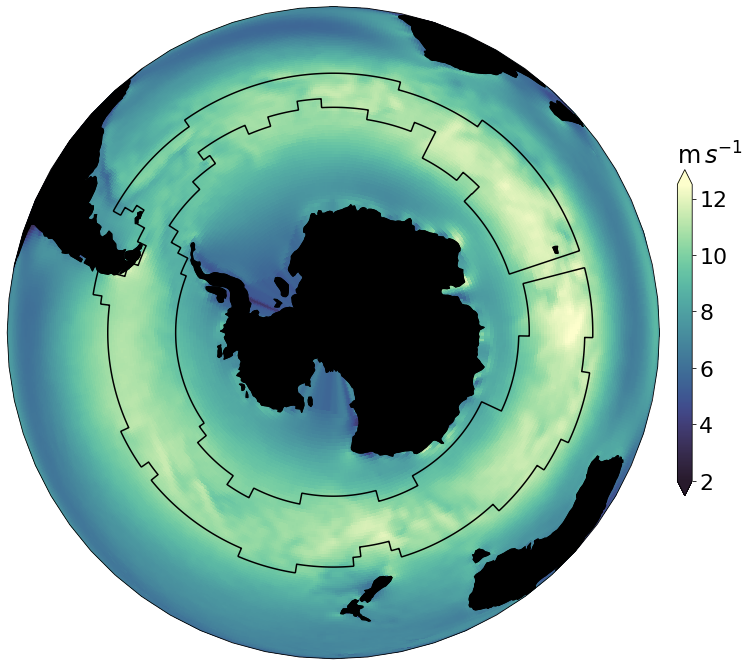

In [69]:
fig, axs = plt.subplots(figsize=(16,12), subplot_kw = {'projection': ccrs.NearsidePerspective(central_latitude = -90)})
map1 = m_wsp_OR_98.plot(transform=ccrs.PlateCarree(), zorder=1, add_colorbar=False, cmap= cm.deep_r, vmax=12.5, vmin=2)

axs.contour(mask_acc.nav_lon, mask_acc.nav_lat, mask_plot_f, transform= ccrs.PlateCarree(),
            colors='black', levels=[1], linewidth=15, zorder=7)

c = plt.colorbar(map1, pad=0.02, shrink=0.5, ax=axs,extend='both')
c.ax.set_title('m$\,s^{-1}$', loc='left', fontsize=24)

axs.set_global()
axs.coastlines()
axs.add_feature(cfeature.LAND, color='black', zorder=4) #oldlace
c.ax.tick_params(labelsize=22)
# axes.Axes.tick_params(axs, axis='both' ,labelsize=22)

save_path = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/master/figures/'
plt.savefig(save_path + 'windspeed_maps_OR_9817.png', format='png', facecolor="w", bbox_inches='tight')

### FOCI

In [70]:
wspeed_F = xr.open_mfdataset(sorted(glob(path_X + '1_*_1m_199[89]*_grid_T.nc')) + 
                            sorted(glob(path_X + '1_*_1m_2*_grid_T.nc'))[0:-2]).sowndspd.where(mask_10X)

In [73]:
wspeed_F = twspeed_F.isel(y=slice(296,923), x=slice(1,-1))

NameError: name 'twspeed_F' is not defined

In [161]:
np.where((wspeed_F.nav_lat>= -65) & (wspeed_F.nav_lat<= -37))[0]

array([371, 371, 371, ..., 835, 835, 835])

In [72]:
wspeed_ts = weighted_mean_adapt(wspeed_F.isel(y=slice(371,835), x=slice(1,-1)), area_X_t.isel(y=slice(371,835))).compute()

NameError: name 'weighted_mean_adapt' is not defined

In [174]:
wspeed_ts.std()

<xarray.DataArray ()>
array(0.8282395)

In [164]:
wspeed_F.isel(y=slice(371,835), x=slice(1,-1))

<xarray.DataArray 'sowndspd' (time_counter: 240, y: 464, x: 3562)>
dask.array<getitem, shape=(240, 464, 3562), dtype=float32, chunksize=(12, 100, 100), chunktype=numpy.ndarray>
Coordinates:
    nav_lat        (y, x) float32 dask.array<chunksize=(464, 3562), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(464, 3562), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 1998-01-16T12:00:00 ... 2017...
Dimensions without coordinates: y, x
Attributes:
    standard_name:       wind_speed
    long_name:           wind speed module
    units:               m/s
    online_operation:    average
    interval_operation:  1800 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 1800 s)

In [166]:
area_X_t = (e1t_X * e2t_X).isel(x=slice(1,-1))

In [168]:
area_X_t.isel(y=slice(371,835))

<xarray.DataArray (y: 464, x: 3562)>
dask.array<getitem, shape=(464, 3562), dtype=float64, chunksize=(100, 100), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x

In [74]:
wspeed_F_b = xr.open_mfdataset(sorted(glob(path_X + 'F*_1m_199[89]*_grid_T.nc')) + 
                            sorted(glob(path_X + 'F*_1m_2*_grid_T.nc'))[0:-2]).sowndspd.where(mask_10X_base)

#### correcting discontinuity

In [75]:
wspeed_F.coords["x"], wspeed_F.coords["y"] = range(len(wspeed_F.x)), range(len(wspeed_F.y))
wspeed_F_b.coords["x"], wspeed_F_b.coords["y"] = range(len(wspeed_F_b.x)), range(len(wspeed_F_b.y))

In [76]:
after_discont_base = ~(wspeed_F_b.coords["nav_lon"].diff("x", label="upper") > 0).cumprod("x").astype(bool)
after_discont = ~(wspeed_F.coords["nav_lon"].diff("x", label="upper") > 0).cumprod("x").astype(bool)

In [77]:
wspeed_F_b.coords["nav_lon"] = (
    wspeed_F_b.coords["nav_lon"]
    + 360 * after_discont_base)

wspeed_F.coords["nav_lon"] = (
    wspeed_F.coords["nav_lon"]
    + 360 * after_discont)

In [78]:
# cropping redundant data
wspeed_F = wspeed_F.isel(x=slice(2,-1), y=slice(None,-1)) #take out unwanted lines
wspeed_F_b = wspeed_F_b.isel(x=slice(1,None))

#### mean

In [79]:
m_wspeed_F = wspeed_F.mean('time_counter').compute()
m_wspeed_F_b = wspeed_F_b.mean('time_counter').compute()

In [585]:
m_wspeed_F.where((wspeed_F.nav_lat <= -37)& (wspeed_F.nav_lat >= -65),drop=True).std()

<xarray.DataArray 'sowndspd' ()>
array(1.12561119)

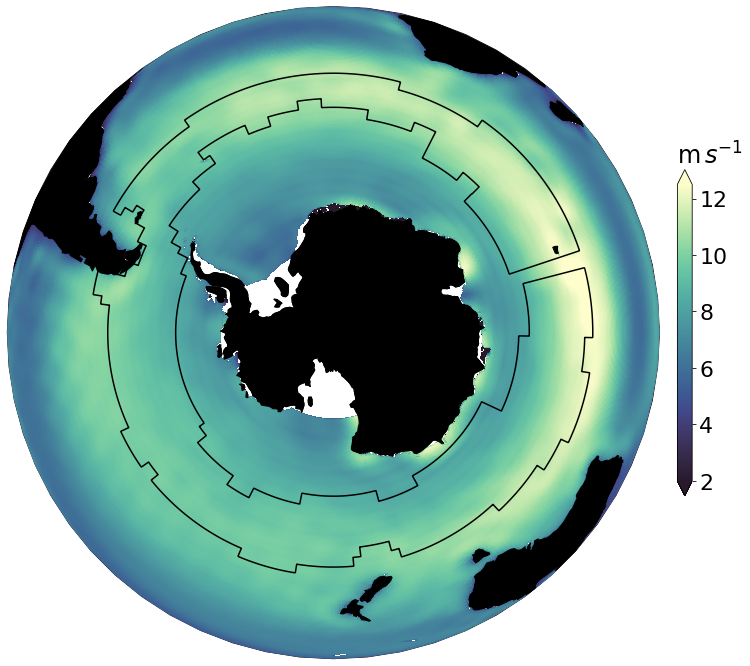

In [81]:
fig, axs = plt.subplots(figsize=(16,12), subplot_kw = {'projection': ccrs.NearsidePerspective(central_latitude = -90)})
map1 = m_wspeed_F.plot(x='nav_lon', y='nav_lat', transform=ccrs.PlateCarree(), zorder=1, add_colorbar=False,
                      vmax=12.5,
                      vmin=2,
                       cmap= cm.deep_r,
                      )

m_wspeed_F_b.plot(x='nav_lon', y='nav_lat', transform=ccrs.PlateCarree(), zorder=3, add_colorbar=False,
                  vmax=12.5,
                  vmin=2,
                 cmap=cm.deep_r)

axs.contour(mask_acc.nav_lon, mask_acc.nav_lat, mask_plot_f, transform= ccrs.PlateCarree(),
            colors='black', levels=[1], linewidth=15, zorder=7)

c = plt.colorbar(map1, pad=0.02, shrink=0.5, ax=axs,extend='both')
c.ax.set_title('m$\,s^{-1}$', loc='left', fontsize=24)

axs.set_global()
axs.coastlines()
axs.add_feature(cfeature.LAND, color='black', zorder=4) #oldlace
c.ax.tick_params(labelsize=22)
axes.Axes.tick_params(axs, axis='both' ,labelsize=18)


plt.savefig(save_path + 'windspeed_maps_FOCI_9817.png', format='png', facecolor="w", bbox_inches='tight')

In [545]:
wspeed_F

<xarray.DataArray 'sowndspd' (y: 944, x: 3564)>
array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [      nan, 5.08715  , 6.0198092, ..., 6.0320497, 5.0830364,
              nan],
       [      nan, 4.2627044, 5.409688 , ..., 5.440692 , 4.273338 ,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
    nav_lat  (y, x) float32 -76.76 -76.76 -76.76 -76.76 ... -27.92 -27.92 -27.92
    nav_lon  (y, x) float32 75.35 75.45 75.55 75.65 ... 71.35 71.45 71.55 71.65
Dimensions without coordinates: y, x

In [49]:
# wspeed = xr.open_mfdataset(sorted(glob(path_X + '1_*_1m_195[89]*_grid_T.nc')) + 
#                             sorted(glob(path_X + '1_*_1m_19[6789]*_grid_T.nc')) + 
#                             sorted(glob(path_X + '1_*_1m_2*_grid_T.nc'))[0:-2]).sowndspd..where(mask_10X)

In [7]:
path

'/scratch/usr/shklvn09/SCRATCH/ORION10.L46.LIM2vp.CFCSF6.MOPS.JRA.XIOS2.5.LP01-EXP05/OUT/'

### wind stress

## ORION10

In [131]:
vstress_OR = xr.open_mfdataset(sorted(glob(path + '1_*_1m_195[89]*_grid_V.nc')) + 
                               sorted(glob(path + '1_*_1m_19[6789]*_grid_V.nc')) + 
                               sorted(glob(path + '1_*_1m_2*_grid_V.nc'))[None:-1]).sometauy.where(mask_10)

ustress_OR = xr.open_mfdataset(sorted(glob(path + '1_*_1m_195[89]*_grid_U.nc')) + 
                               sorted(glob(path + '1_*_1m_19[6789]*_grid_U.nc')) + 
                               sorted(glob(path + '1_*_1m_2*_grid_U.nc'))[None:-1]).sozotaux.where(mask_10)

In [101]:
ustress_OR = ustress_OR.isel(y=slice(1,-1), x=slice(1,-1))
vstress_OR = vstress_OR.isel(y=slice(1,-1), x=slice(1,-1))

In [102]:
wstress_OR = np.abs(np.sqrt(ustress_OR**2 + vstress_OR**2))

In [103]:
wstress_OR_ts = weighted_mean(wstress_OR, area_O, mask_plot).compute()

In [66]:
# vspeed_OR_0 = xr.open_mfdataset(sorted(glob(path_wspeed_OR + 'vas-drowned_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-4-0_gr_y*.nc'))[0]).vas

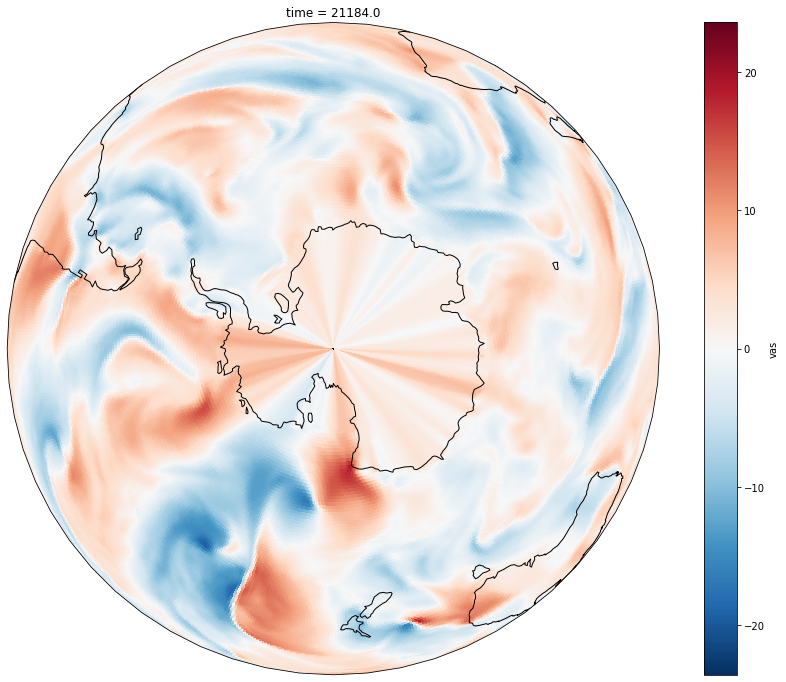

In [31]:
fig, axs = plt.subplots(figsize=(16,12), subplot_kw = {'projection': ccrs.NearsidePerspective(central_latitude = -90)})
vspeed_OR.isel(time=0).plot(transform=ccrs.PlateCarree())
axs.coastlines()
axs.add_feature(cfeature.LAND, color='black')
axs.set_global()

## FOCI

In [86]:
wstress = xr.open_mfdataset(sorted(glob(path_X + '1_*_1m_195[89]*_grid_T.nc')) + 
                            sorted(glob(path_X + '1_*_1m_19[6789]*_grid_T.nc')) + 
                            sorted(glob(path_X + '1_*_1m_2*_grid_T.nc'))[0:-2]).sowndstr.where(mask_10X)

In [87]:
wstress = wstress.isel(y=slice(296,923), x=slice(1,-1))

In [88]:
wstress_ts =  weighted_mean(wstress, area_X, mask_plot).compute()

In [61]:
# wspeed_ts = weighted_mean(wspeed, area_X, mask_plot).compute()

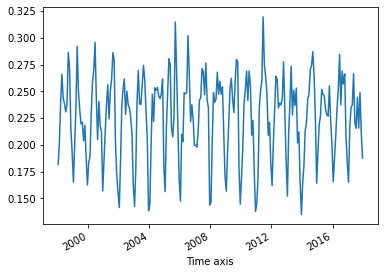

In [78]:
# wstress_ts.sel(time_counter=slice('1998','2017')).plot()

## wind stress time series

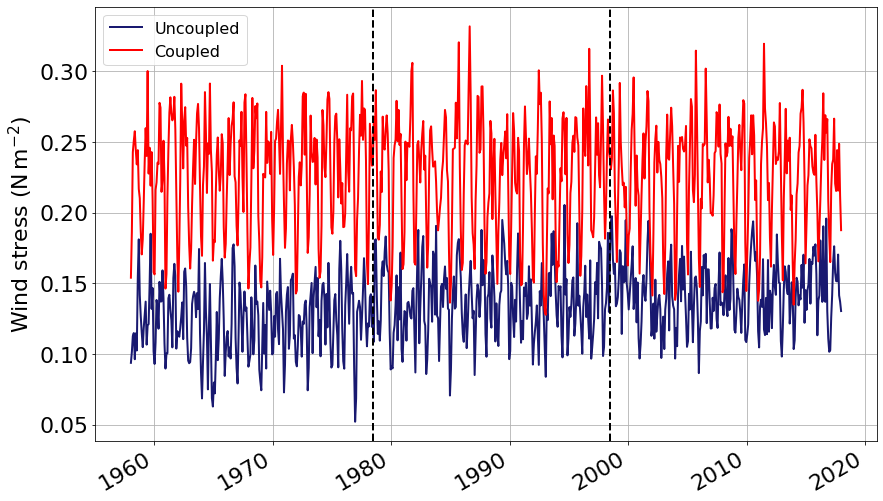

In [124]:
fig, axs = plt.subplots(figsize=(14,8))

wstress_OR_ts.plot(ax=axs, label='Uncoupled', color='midnightblue', linewidth=2)
wstress_ts.plot(ax=axs, label= 'Coupled', color='red', linewidth=2)

axs.axvline(x=dt.datetime(1978,7,1), color='k', linestyle='--', linewidth=2)
axs.axvline(x=dt.datetime(1998,7,1), color='k', linestyle='--', linewidth=2)
axs.set_title(None)
axs.tick_params(axis= 'x', labelsize= 22)
axs.tick_params(axis= 'y', labelsize= 22)
axs.set_xlabel(None)
axs.set_ylabel('Wind stress (N$\,$m$^{-2}$)', fontsize=22)
axs.grid()

plt.legend(fontsize=16)
# plt.title('a)', loc='left', fontsize=22)

save_path = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/master/figures/'
# plt.savefig(save_path + 'wstress_timeseries_models_monthly.png', format='png', facecolor="w",  bbox_inches='tight')

In [89]:
time = pd.date_range(start='1958-04',periods=60, freq='Y')

In [104]:
wstress_OR_ts_y = wstress_OR_ts.groupby('time_counter.year').mean().rename({'year':'time_counter'})

In [96]:
wstress_OR_ts_y

<xarray.DataArray (time_counter: 58)>
array([0.12282393, 0.13082506, 0.12731695, 0.12980516, 0.12520851,
       0.12915973, 0.10734109, 0.11857948, 0.12359992, 0.1225366 ,
       0.11737242, 0.1201536 , 0.12503594, 0.12757733, 0.11598888,
       0.13449223, 0.13068335, 0.12910596, 0.13065099, 0.12876589,
       0.13700271, 0.14795812, 0.12312781, 0.13084597, 0.13943407,
       0.14322271, 0.13416452, 0.14853407, 0.13301051, 0.14172667,
       0.13588788, 0.15352792, 0.13954162, 0.13400871, 0.12691794,
       0.14942479, 0.13671683, 0.14117672, 0.12883527, 0.14379803,
       0.16164148, 0.15539248, 0.14153174, 0.15055187, 0.12789356,
       0.14024717, 0.14275452, 0.13466959, 0.14709411, 0.13997743,
       0.14853323, 0.13388346, 0.16013477, 0.13461901, 0.14511015,
       0.14273917, 0.14489999, 0.15584924])
Coordinates:
  * time_counter  (time_counter) int64 1958 1959 1960 1961 ... 2013 2014 2015

In [93]:
wstress_ts_y = wstress_ts.groupby('time_counter.year').mean().rename({'year':'time_counter'})

In [105]:
wstress_OR_ts_y.coords['time_counter'] = time.values

In [94]:
wstress_ts_y.coords['time_counter'] = time.values

In [599]:
wstress_ts_y.sel(time_counter=slice('1998','2017')).mean() / wstress_OR_ts_y.sel(time_counter=slice('1998','2017')).mean()

<xarray.DataArray ()>
array(1.57864851)

In [597]:
wstress_ts_y.mean()

<xarray.DataArray ()>
array(0.2269178)

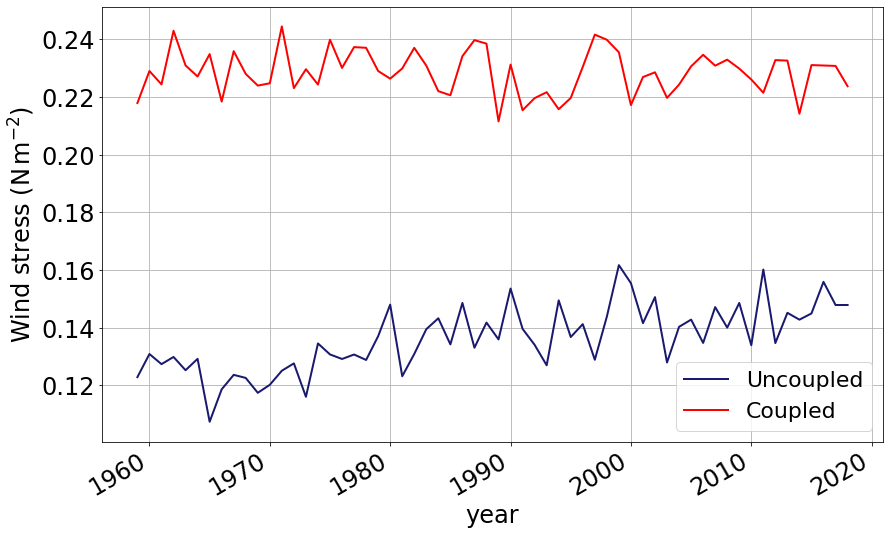

In [115]:
fig, axs = plt.subplots(figsize=(14,8))

wstress_OR_ts_y.plot(ax=axs, label='Uncoupled', color='midnightblue', linewidth=2)
wstress_ts_y.plot(ax=axs, label= 'Coupled', color='red', linewidth=2)

# axs.axvline(x=dt.datetime(1978,7,1), color='k', linestyle='--', linewidth=2)
# axs.axvline(x=dt.datetime(1998,7,1), color='k', linestyle='--', linewidth=2)
axs.set_title(None)
axs.tick_params(axis= 'x', labelsize= 24)
axs.tick_params(axis= 'y', labelsize= 24)
axs.set_xlabel(None)
axs.set_ylabel('Wind stress (N$\,$m$^{-2}$)', fontsize=24)
# axs.set_ylabel('N$\,$m$^{-2}$', fontsize=24)

axs.set_xlabel('year', fontsize=24)

axs.grid()

plt.legend(fontsize=22)
# plt.title(', loc='left', fontsize=22)

save_path = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/master/figures/'
plt.savefig(save_path + 'wstress_timeseries_models_annual_nlines.png', format='png', facecolor="w",  bbox_inches='tight')

## Spatial mean

In [116]:
wstress_p = xr.open_mfdataset(sorted(glob(path_X + '1_*_1m_195[89]*_grid_T.nc')) + 
                            sorted(glob(path_X + '1_*_1m_19[6789]*_grid_T.nc')) + 
                            sorted(glob(path_X + '1_*_1m_2*_grid_T.nc'))[0:-2]).sowndstr.where(mask_10X)

In [117]:
wstress_p_base = xr.open_mfdataset(sorted(glob(path_X + 'F*_1m_195[89]*_grid_T.nc')) + 
                            sorted(glob(path_X + 'F*_1m_19[6789]*_grid_T.nc')) + 
                            sorted(glob(path_X + 'F*_1m_2*_grid_T.nc'))[0:-2]).sowndstr.where(mask_10X_base)

In [126]:
vstress_OR_b = xr.open_mfdataset(sorted(glob(path + 'O*_1m_195[89]*_grid_V.nc')) + 
                               sorted(glob(path + 'O*_1m_19[6789]*_grid_V.nc')) + 
                               sorted(glob(path + 'O*_1m_2*_grid_V.nc'))[None:-1]).sometauy.where(mask_10_base)

ustress_OR_b = xr.open_mfdataset(sorted(glob(path + 'O*_1m_195[89]*_grid_U.nc')) + 
                               sorted(glob(path + 'O*_1m_19[6789]*_grid_U.nc')) + 
                               sorted(glob(path + 'O*_1m_2*_grid_U.nc'))[None:-1]).sozotaux.where(mask_10_base)

In [127]:
wstress_OR_b = np.abs(np.sqrt(ustress_OR_b**2 + vstress_OR_b**2))

In [132]:
wstress_OR = np.abs(np.sqrt(ustress_OR**2 + vstress_OR**2))

In [ ]:
lon_10

## correcting discontinuity

In [120]:
lon_10_base = xr.open_mfdataset(paths = sorted(glob(path + 'O*_1m_195[89]*_grid_V.nc'))[0]).nav_lon
lat_10_base = xr.open_mfdataset(paths = sorted(glob(path + 'O*_1m_195[89]*_grid_V.nc'))[0]).nav_lat

In [121]:
lon_10 = xr.open_mfdataset(paths = sorted(glob(path + '1*_1m_195[89]*_grid_V.nc'))[0]).nav_lon
lat_10 = xr.open_mfdataset(paths = sorted(glob(path + '1*_1m_195[89]*_grid_V.nc'))[0]).nav_lat

In [133]:
# wstress_OR_b = wstress_OR_b.assign_coords(nav_lat= lat_10_base, nav_lon=lon_10_base)
wstress_OR = wstress_OR.assign_coords(nav_lat= lat_10, nav_lon=lon_10)

In [134]:
wstress_p.coords["x"], wstress_p.coords["y"] = range(len(wstress_p.x)), range(len(wstress_p.y))
wstress_p_base.coords["x"], wstress_p_base.coords["y"] = range(len(wstress_p_base.x)), range(len(wstress_p_base.y))

wstress_OR.coords["x"], wstress_OR.coords["y"] = range(len(wstress_OR.x)), range(len(wstress_OR.y))
wstress_OR_b.coords["x"], wstress_OR_b.coords["y"] = range(len(wstress_OR_b.x)), range(len(wstress_OR_b.y))

In [135]:
after_discont_base = ~(wstress_p_base.coords["nav_lon"].diff("x", label="upper") > 0).cumprod("x").astype(bool)
after_discont = ~(wstress_p.coords["nav_lon"].diff("x", label="upper") > 0).cumprod("x").astype(bool)

after_discont_base_OR = ~(wstress_OR_b.coords["nav_lon"].diff("x", label="upper") > 0).cumprod("x").astype(bool)
after_discont_OR = ~(wstress_OR.coords["nav_lon"].diff("x", label="upper") > 0).cumprod("x").astype(bool)

In [136]:
wstress_p_base.coords["nav_lon"] = (
    wstress_p_base.coords["nav_lon"]
    + 360 * after_discont_base)

wstress_p.coords["nav_lon"] = (
    wstress_p.coords["nav_lon"]
    + 360 * after_discont)

wstress_OR_b.coords["nav_lon"] = (
    wstress_OR_b.coords["nav_lon"]
    + 360 * after_discont_base_OR)

wstress_OR.coords["nav_lon"] = (
    wstress_OR.coords["nav_lon"]
    + 360 * after_discont_OR)

In [137]:
wstress_OR = wstress_OR.isel(x=slice(1,-1), y=slice(1,-1))
wstress_OR_b = wstress_OR_b.isel(y=slice(1,None), x=slice(1,None))

In [138]:
# cropping redundant data
wstress_p = wstress_p.isel(x=slice(2,-1), y=slice(None,-1)) #take out unwanted lines
wstress_p_base = wstress_p_base.isel(x=slice(1,None))

In [425]:
# m_5817_F_b = wstress_p_base.mean(dim='time_counter').compute()
# m_5817_F = wstress_p.mean(dim='time_counter').compute()

# m_5817_O_b = wstress_OR_b.mean(dim='time_counter').compute()
# m_5817_O = wstress_OR.mean(dim='time_counter').compute()

In [139]:
m_9817_F_b = wstress_p_base.sel(time_counter=slice('1998','2017')).mean(dim='time_counter').compute()
m_9817_F = wstress_p.sel(time_counter=slice('1998','2017')).mean(dim='time_counter').compute()

m_9817_O_b = wstress_OR_b.sel(time_counter=slice('1998','2017')).mean(dim='time_counter').compute()
m_9817_O = wstress_OR.sel(time_counter=slice('1998','2017')).mean(dim='time_counter').compute()

In [413]:
# mask_plot_f = mask_plot.where(((mask_plot.nav_lon < 431.56) & (mask_plot.nav_lon > 75.5)) , other=0)

In [ ]:
# mask_plot.nav_lon.values

In [169]:
# mask_plot_f = mask_plot.where(mask_plot.nav_lat >= -65, other=0)
# mask_plot_f = mask_plot.where(mask_plot.nav_lon > 75.5, other=0)
# mask_plot_f = mask_plot.where(mask_plot.nav_lon < 431.58, other=0)

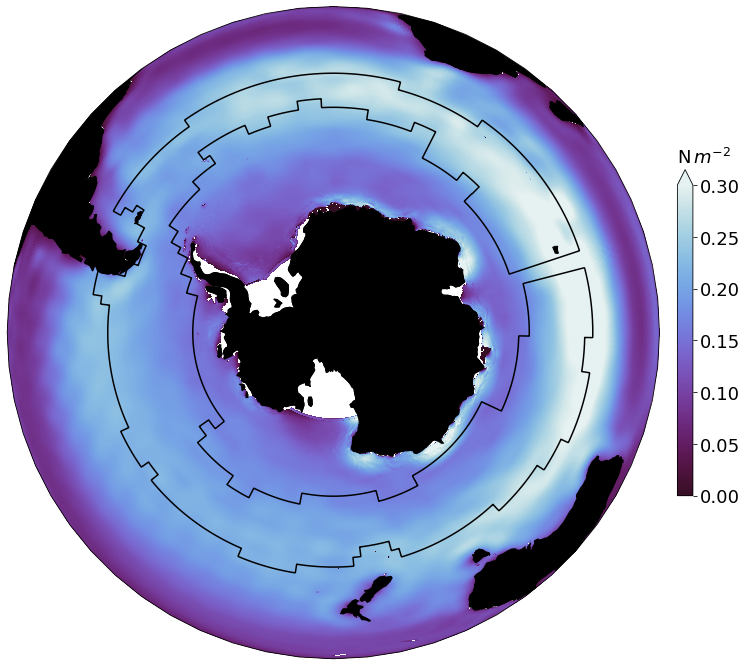

In [593]:
# fig, axs = plt.subplots(figsize=(16,12), subplot_kw = {'projection': ccrs.NearsidePerspective(central_latitude = -90)})

# # levs = np.hstack((np.arange(0, 0.1, 0.05), np.arange(0.1,  0.4, 0.1)))
# # norm = colors.BoundaryNorm(boundaries=levs, ncolors=356)

# map1 = m_5817_F.plot(x='nav_lon', y='nav_lat', transform = ccrs.PlateCarree(), ax= axs, zorder = 3, 
#                add_colorbar=False, vmax=0.3, vmin=0,#norm=norm, 
#                        cmap= cm.dense_r)

# m_5817_F_b.plot(x='nav_lon', y='nav_lat', transform = ccrs.PlateCarree(), ax= axs, zorder = 1,
#                                add_colorbar= False, vmax=0.3,#norm=norm,#vmax=(eke_1_m * 1e4).max().values),
#                                cmap = cm.dense_r)

# axs.contour(mask_acc.nav_lon, mask_acc.nav_lat, mask_plot_f, transform= ccrs.PlateCarree(),
#             colors='black', levels=[1], linewidth=5, zorder=7)

# c = plt.colorbar(map1, pad=0.02, shrink=0.5, ax=axs,extend='max')
# c.ax.set_title('N$\,m^{-2}$', loc='left', fontsize=18)

# axs.set_global()
# axs.coastlines()
# axs.add_feature(cfeature.LAND, color='black', zorder=4) #oldlace
# c.ax.tick_params(labelsize=18)
# axes.Axes.tick_params(axs, axis='both' ,labelsize=18)

# # axs.set_title('Wind stress - Coupled', fontsize=22)

# savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/master/figures/'
# # plt.savefig(savepath + 'windstress_maps_FOCI_5817.png', format='png', facecolor="w", bbox_inches='tight')

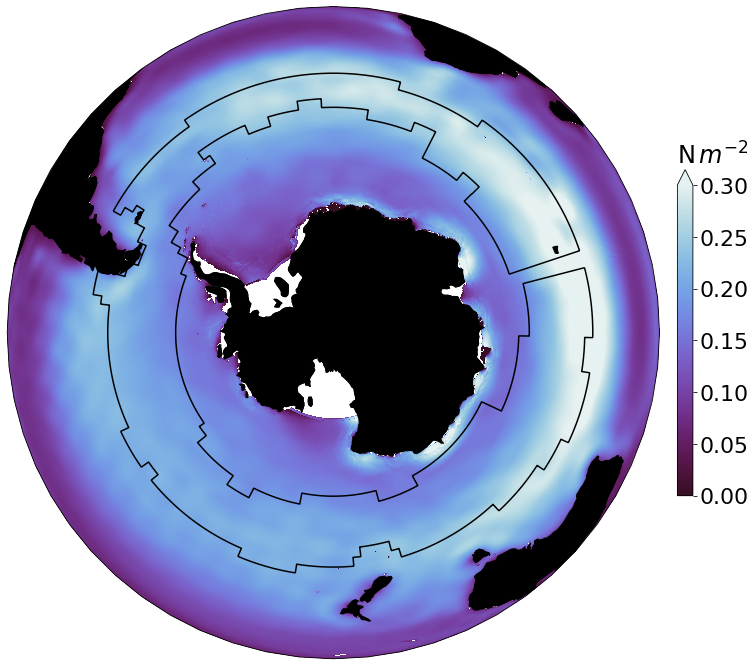

In [142]:
fig, axs = plt.subplots(figsize=(16,12), subplot_kw = {'projection': ccrs.NearsidePerspective(central_latitude = -90)})

map1 = m_9817_F.plot(x='nav_lon', y='nav_lat', transform = ccrs.PlateCarree(), ax= axs, zorder = 3, 
               add_colorbar=False, vmax=0.3, vmin=0,
                       cmap= cm.dense_r)

m_9817_F_b.plot(x='nav_lon', y='nav_lat', transform = ccrs.PlateCarree(), ax= axs, zorder = 1,
                               add_colorbar= False, vmax=0.3, vmin=0,
                               cmap = cm.dense_r)

axs.contour(mask_acc.nav_lon, mask_acc.nav_lat, mask_plot_f, transform= ccrs.PlateCarree(),
            colors='black', levels=[1], linewidth=15, zorder=7)

c = plt.colorbar(map1, pad=0.02, shrink=0.5, ax=axs, extend='max')
c.ax.set_title('N$\,m^{-2}$', loc='left', fontsize=24)

axs.set_global()
axs.coastlines()
axs.add_feature(cfeature.LAND, color='black', zorder=4) #oldlace
c.ax.tick_params(labelsize=22)
# axes.Axes.tick_params(axs, axis='both' ,labelsize=18)

# axs.set_title('Wind stress - Coupled', fontsize=22)

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/master/figures/'
plt.savefig(savepath + 'windstress_maps_FOCI_9817.png', format='png', facecolor="w", bbox_inches='tight')

## ORION10

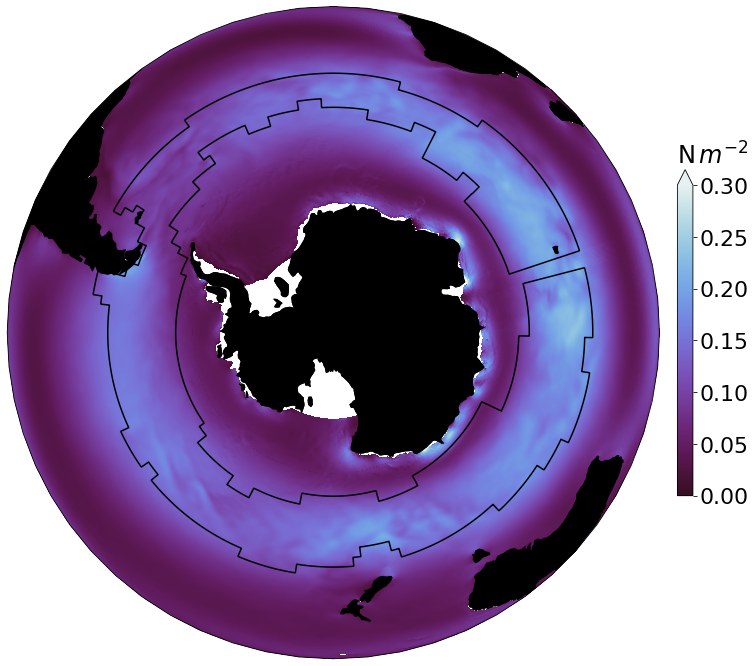

In [149]:
fig, axs = plt.subplots(figsize=(16,12), subplot_kw = {'projection': ccrs.NearsidePerspective(central_latitude = -90)})

map1 = m_9817_O.plot(x='nav_lon', y='nav_lat', transform = ccrs.PlateCarree(), ax= axs, zorder = 3, 
               add_colorbar=False, vmax=0.3, vmin=0,
                       cmap= cm.dense_r)

m_9817_O_b.plot(x='nav_lon', y='nav_lat', transform = ccrs.PlateCarree(), ax= axs, zorder = 1,
                               add_colorbar= False, vmax=0.3, vmin=0,
                               cmap = cm.dense_r)

axs.contour(mask_acc.nav_lon, mask_acc.nav_lat, mask_plot_f, transform= ccrs.PlateCarree(),
            colors='black', levels=[1], linewidth=15, zorder=7)

c = plt.colorbar(map1, pad=0.02, shrink=0.5, ax=axs, extend='max')
c.ax.set_title('N$\,m^{-2}$', loc='left', fontsize=24)

axs.set_global()
axs.coastlines()
axs.add_feature(cfeature.LAND, color='black', zorder=4) #oldlace
c.ax.tick_params(labelsize=22)
axes.Axes.tick_params(axs, axis='both' ,labelsize=22)

# axs.set_title('Wind stress - Uncoupled', fontsize=22)

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/master/figures/'
plt.savefig(savepath + 'windstress_maps_OR_9817.png', format='png', facecolor="w", bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(figsize=(16,12), subplot_kw = {'projection': ccrs.NearsidePerspective(central_latitude = -90)})

map1 = m_5817_O.plot(x='nav_lon', y='nav_lat', transform = ccrs.PlateCarree(), ax= axs, zorder = 3, 
               add_colorbar=False, vmax=0.3, vmin=0,
                       cmap= cm.dense_r)

m_5817_O_b.plot(x='nav_lon', y='nav_lat', transform = ccrs.PlateCarree(), ax= axs, zorder = 1,
                               add_colorbar= False, vmax=0.3, vmin=0,
                               cmap = cm.dense_r)

axs.contour(mask_acc.nav_lon, mask_acc.nav_lat, mask_plot_f, transform= ccrs.PlateCarree(),
            colors='black', levels=[1], linewidth=7, zorder=7)

c = plt.colorbar(map1, pad=0.02, shrink=0.5, ax=axs, extend='max')
c.ax.set_title('N$\,m^{-2}$', loc='left', fontsize=18)

axs.set_global()
axs.coastlines()
axs.add_feature(cfeature.LAND, color='black', zorder=4) #oldlace
c.ax.tick_params(labelsize=18)
axes.Axes.tick_params(axs, axis='both' ,labelsize=18)

# axs.set_title('Wind stress - Uncoupled', fontsize=22)

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/master/figures/'
# plt.savefig(savepath + 'windstress_maps_OR_5817.png', format='png', facecolor="w", bbox_inches='tight')

## Difference between models

In [451]:
np.where((m_5817_F.nav_lat >= -67.96) & (m_5817_F.nav_lat<=-29.72))[0]

array([297, 297, 297, ..., 922, 922, 922])

In [145]:
m_5817_F_t = m_5817_F.isel(y=slice(297,924))

NameError: name 'm_5817_F' is not defined

In [488]:
m_5817_O_t = m_5817_O.isel(x=slice(1,None))

m_5817_F_t.coords['y'] = m_5817_O_t.coords['y']

m_5817_diff_t = m_5817_F_t - m_5817_O_t

m_5817_diff_t.coords['nav_lat'] = m_5817_O_t.coords['nav_lat']

### base

In [501]:
m_5817_F_b = m_5817_F_b.isel(y=slice(1,None))

m_5817_diff_b = m_5817_F_b - m_5817_O_b

m_5817_diff_b.coords['nav_lat'] = m_5817_O_b.coords['nav_lat']

m_5817_diff_b.coords['nav_lon'] = m_5817_O_b.coords['nav_lon']

In [505]:
m_5817_diff_b.max(), m_5817_diff_b.min(), m_5817_diff_t.max(), m_5817_diff_t.min()

(<xarray.DataArray ()>
 array(0.45721501),
 <xarray.DataArray ()>
 array(-0.23187847),
 <xarray.DataArray ()>
 array(0.26732382),
 <xarray.DataArray ()>
 array(-0.25336701))

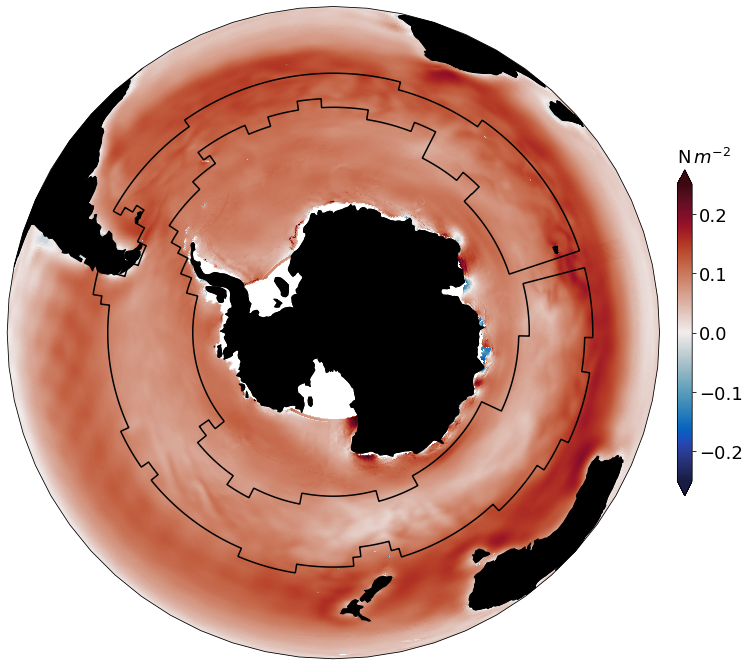

In [507]:
fig, axs = plt.subplots(figsize=(16,12), subplot_kw = {'projection': ccrs.NearsidePerspective(central_latitude = -90)})

map1 = m_5817_diff_t.plot(x='nav_lon', y='nav_lat', transform = ccrs.PlateCarree(), ax= axs, zorder = 3, 
               add_colorbar=False,vmax= 0.25, vmin=-0.25,
                       cmap= cm.balance)

m_5817_diff_b.plot(x='nav_lon', y='nav_lat', transform = ccrs.PlateCarree(), ax= axs, zorder = 1,
                               add_colorbar= False, vmax= 0.25, vmin=-0.25,
                               cmap = cm.balance)

axs.contour(mask_acc.nav_lon, mask_acc.nav_lat, mask_plot_f, transform= ccrs.PlateCarree(),
            colors='black', levels=[1], linewidth=5, zorder=7)

c = plt.colorbar(map1, pad=0.02, shrink=0.5, ax=axs, extend='both')
c.ax.set_title('N$\,m^{-2}$', loc='left', fontsize=18)

axs.set_global()
axs.coastlines()
axs.add_feature(cfeature.LAND, color='black', zorder=4) #oldlace
c.ax.tick_params(labelsize=18)
axes.Axes.tick_params(axs, axis='both' ,labelsize=18)

# axs.set_title('Wind stress - Uncoupled', fontsize=22)

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/master/figures/'
plt.savefig(savepath + 'windstress_maps_diff_5817.png', format='png', facecolor="w", bbox_inches='tight')

### 9817

In [146]:
m_9817_F_t = m_9817_F.isel(y=slice(297,924))

m_9817_O_t = m_9817_O.isel(x=slice(1,None))

m_9817_F_t.coords['y'] = m_9817_O_t.coords['y']

m_9817_diff_t = m_9817_F_t - m_9817_O_t

m_9817_diff_t.coords['nav_lat'] = m_9817_O_t.coords['nav_lat']

In [147]:
m_9817_F_b_t = m_9817_F_b.isel(y=slice(1,None))

m_9817_diff_b = m_9817_F_b_t - m_9817_O_b

m_9817_diff_b.coords['nav_lat'] = m_9817_O_b.coords['nav_lat']

m_9817_diff_b.coords['nav_lon'] = m_9817_O_b.coords['nav_lon']

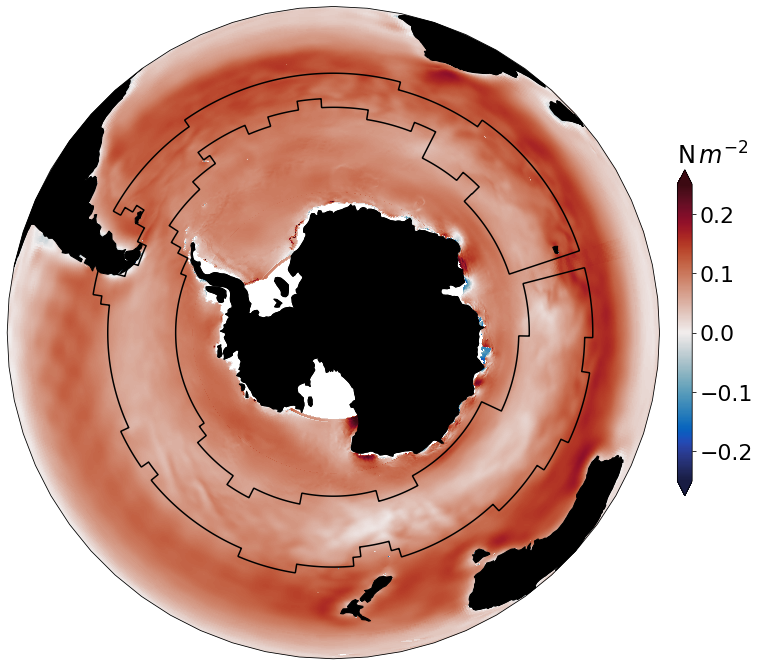

In [151]:
fig, axs = plt.subplots(figsize=(16,12), subplot_kw = {'projection': ccrs.NearsidePerspective(central_latitude = -90)})

map1 = m_9817_diff_t.plot(x='nav_lon', y='nav_lat', transform = ccrs.PlateCarree(), ax= axs, zorder = 3, 
               add_colorbar=False,vmax= 0.25, vmin=-0.25,
                       cmap= cm.balance)

m_9817_diff_b.plot(x='nav_lon', y='nav_lat', transform = ccrs.PlateCarree(), ax= axs, zorder = 1,
                               add_colorbar= False, vmax= 0.25, vmin=-0.25,
                               cmap = cm.balance)

axs.contour(mask_acc.nav_lon, mask_acc.nav_lat, mask_plot_f, transform= ccrs.PlateCarree(),
            colors='black', levels=[1], linewidth=15, zorder=7)

c = plt.colorbar(map1, pad=0.02, shrink=0.5, ax=axs, extend='both')
c.ax.set_title('N$\,m^{-2}$', loc='left', fontsize=24)

axs.set_global()
axs.coastlines()
axs.add_feature(cfeature.LAND, color='black', zorder=4) #oldlace
c.ax.tick_params(labelsize=22)
axes.Axes.tick_params(axs, axis='both' ,labelsize=18)

# axs.set_title('Wind stress - Uncoupled', fontsize=22)

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/master/figures/'
plt.savefig(savepath + 'windstress_maps_diff_9817.png', format='png', facecolor="w", bbox_inches='tight')

In [512]:
m_9817_O_b

<xarray.DataArray (y: 510, x: 721)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    nav_lon  (y, x) float64 73.25 73.75 74.25 74.75 ... 433.0 433.0 433.0 433.0
    nav_lat  (y, x) float32 -76.84 -76.84 -76.84 -76.84 ... 50.07 49.99 49.99
  * x        (x) int64 1 2 3 4 5 6 7 8 9 ... 713 714 715 716 717 718 719 720 721
  * y        (y) int64 1 2 3 4 5 6 7 8 9 ... 502 503 504 505 506 507 508 509 510

### CHECKING different EKE - torge script

In [180]:
eke_ORION = xr.open_dataset(glob('/scratch/usr/shkifmmp/master/data/ORION10/EKE/EKE_torgescript/1_*EKE*nc')[0]).vozocrtx.squeeze()

In [182]:
eke_FO = xr.open_dataset(glob('/scratch/usr/shkifmmp/master/data/ORION10X/EKE/EKE_torgescript/1_*EKE*nc')[0]).vozocrtx.squeeze()

## weighted mean

In [186]:
eke_ORION = eke_ORION.isel(x=slice(1,-1),y=slice(1,-1))

In [187]:
eke_O_mean = weighted_mean(eke_ORION, area_O, mask_plot)

In [191]:
eke_FO = eke_FO.isel(y=slice(296,923), x=slice(1,-1))

In [192]:
eke_F_mean = weighted_mean(eke_FO, area_X, mask_plot)

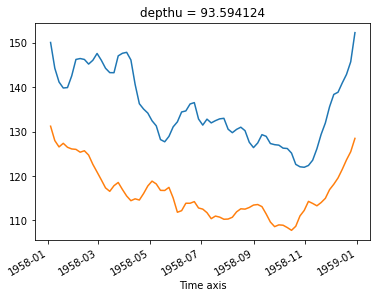

In [195]:
(1e4*eke_F_mean).plot()
(1e4*eke_O_mean).plot()

In [197]:
(1e4*eke_F_mean).mean().values, 135.3014263

array(135.30143355)

In [200]:
(1e4*eke_O_mean).mean().values, 116.32539912

(array(116.32539911), 116.32539912)

In [211]:
eke_10X

<xarray.DataArray 'vozocrtx' (time_counter: 60, y: 629, x: 3564)>
dask.array<where, shape=(60, 629, 3564), dtype=float32, chunksize=(1, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1958-07-02T12:00:00 ... 2017-...
    nav_lon       (y, x) float32 dask.array<chunksize=(5, 100), meta=np.ndarray>
    nav_lat       (y, x) float32 dask.array<chunksize=(5, 100), meta=np.ndarray>
    depthu        float32 93.59
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_water_x_velocity
    long_name:           ocean current along i-axis
    units:               m/s
    online_operation:    average
    interval_operation:  360 s
    interval_write:      5 d
    cell_methods:        time: mean (interval: 360 s) time_counter: mean

In [219]:
eke_mean_FO = eke_FO.mean('time_counter')

In [221]:
fo_try = eke_10X.isel(time_counter=0, y=slice(296,923), x=slice(1,-1))

In [226]:
eke_10X

<xarray.DataArray 'vozocrtx' (time_counter: 60, y: 629, x: 3564)>
dask.array<where, shape=(60, 629, 3564), dtype=float32, chunksize=(1, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1958-07-02T12:00:00 ... 2017-...
    nav_lon       (y, x) float32 dask.array<chunksize=(5, 100), meta=np.ndarray>
    nav_lat       (y, x) float32 dask.array<chunksize=(5, 100), meta=np.ndarray>
    depthu        float32 93.59
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_water_x_velocity
    long_name:           ocean current along i-axis
    units:               m/s
    online_operation:    average
    interval_operation:  360 s
    interval_write:      5 d
    cell_methods:        time: mean (interval: 360 s) time_counter: mean

In [223]:
eke_10X.isel(time_counter=0, y=slice(296,923), x=slice(1,-1))

<xarray.DataArray 'vozocrtx' (y: 333, x: 3562)>
dask.array<getitem, shape=(333, 3562), dtype=float32, chunksize=(100, 100), chunktype=numpy.ndarray>
Coordinates:
    time_counter  datetime64[ns] 1958-07-02T12:00:00
    nav_lon       (y, x) float32 dask.array<chunksize=(9, 99), meta=np.ndarray>
    nav_lat       (y, x) float32 dask.array<chunksize=(9, 99), meta=np.ndarray>
    depthu        float32 93.59
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_water_x_velocity
    long_name:           ocean current along i-axis
    units:               m/s
    online_operation:    average
    interval_operation:  360 s
    interval_write:      5 d
    cell_methods:        time: mean (interval: 360 s) time_counter: mean

In [224]:
eke_10.isel(time_counter=0).isel(x=slice(1,-1),y=slice(1,-1))

<xarray.DataArray 'vozocrtx' (y: 627, x: 3562)>
dask.array<getitem, shape=(627, 3562), dtype=float32, chunksize=(100, 100), chunktype=numpy.ndarray>
Coordinates:
    time_counter  datetime64[ns] 1958-07-02T12:00:00
    nav_lon       (y, x) float32 dask.array<chunksize=(99, 99), meta=np.ndarray>
    nav_lat       (y, x) float32 dask.array<chunksize=(99, 99), meta=np.ndarray>
    depthu        float32 93.59
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_water_x_velocity
    long_name:           Sea Water X Velocity
    units:               m/s
    online_operation:    average
    interval_operation:  400 s
    interval_write:      1 d
    cell_methods:        time: mean (interval: 400 s) time_counter: mean

In [228]:
eke_teste_diff_O = (eke_10.isel(time_counter=0).isel(x=slice(1,-1),y=slice(1,-1)) - eke_ORION.mean()).compute()

In [233]:
eke_teste_diff_X = (eke_10X.isel(time_counter=0, y=slice(1,-1), x=slice(1,-1)) - eke_FO.mean()).compute()

In [217]:
eke_teste_diff_X.shape

(333, 3562)

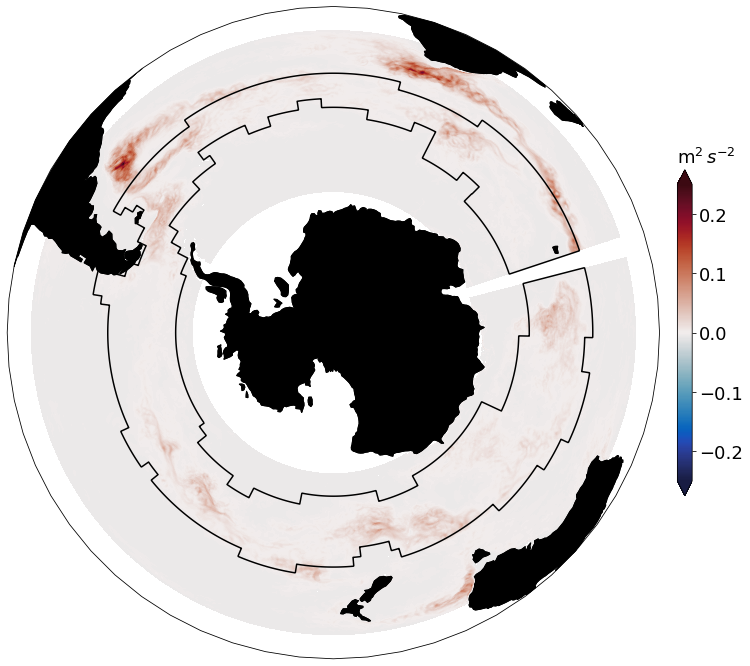

In [236]:
fig, axs = plt.subplots(figsize=(16,12), subplot_kw = {'projection': ccrs.NearsidePerspective(central_latitude = -90)})

# map1 = m_9817_diff_t.plot(x='nav_lon', y='nav_lat', transform = ccrs.PlateCarree(), ax= axs, zorder = 3, 
#                add_colorbar=False,vmax= 0.25, vmin=-0.25,
#                        cmap= cm.balance)

eke_teste_diff_O.plot(x='nav_lon', y='nav_lat', transform = ccrs.PlateCarree(), ax= axs, zorder = 1,
                               add_colorbar= False, #vmax= 0.25, vmin=-0.25,
                               cmap = cm.balance)

axs.contour(mask_acc.nav_lon, mask_acc.nav_lat, mask_plot_f, transform= ccrs.PlateCarree(),
            colors='black', levels=[1], linewidth=7, zorder=7)

c = plt.colorbar(map1, pad=0.02, shrink=0.5, ax=axs, extend='both')
c.ax.set_title('m$^{2}\,s^{-2}$', loc='left', fontsize=18)

axs.set_global()
axs.coastlines()
axs.add_feature(cfeature.LAND, color='black', zorder=4) #oldlace
c.ax.tick_params(labelsize=18)
axes.Axes.tick_params(axs, axis='both' ,labelsize=18)
axs.set_title(None)

# axs.set_title('Wind stress - Uncoupled', fontsize=22)

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/master/figures/'
plt.savefig(savepath + 'comparison_ekemap_58_OR.png', format='png', facecolor="w", bbox_inches='tight')

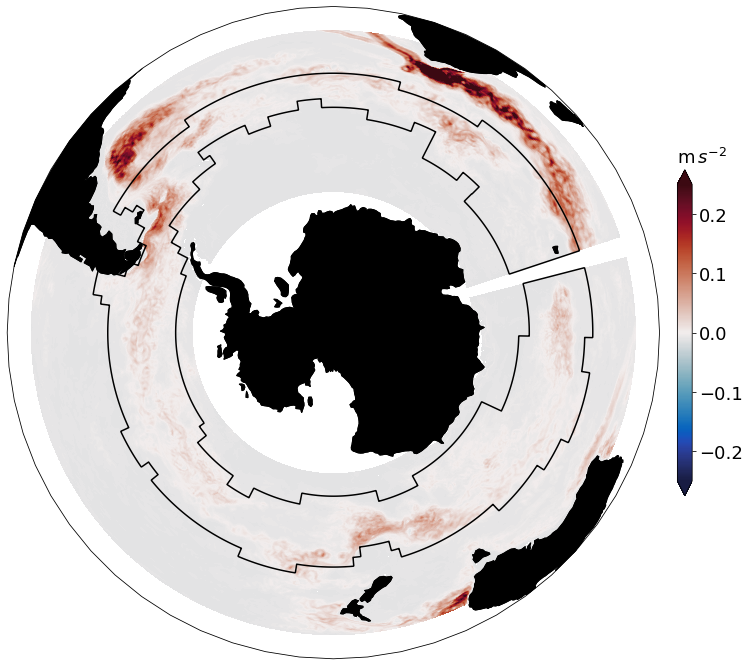

In [238]:
fig, axs = plt.subplots(figsize=(16,12), subplot_kw = {'projection': ccrs.NearsidePerspective(central_latitude = -90)})

# map1 = m_9817_diff_t.plot(x='nav_lon', y='nav_lat', transform = ccrs.PlateCarree(), ax= axs, zorder = 3, 
#                add_colorbar=False,vmax= 0.25, vmin=-0.25,
#                        cmap= cm.balance)

eke_teste_diff_X.plot(x='nav_lon', y='nav_lat', transform = ccrs.PlateCarree(), ax= axs, zorder = 1,
                               add_colorbar= False, vmax= 0.25, vmin=-0.25,
                               cmap = cm.balance)

axs.contour(mask_acc.nav_lon, mask_acc.nav_lat, mask_plot_f, transform= ccrs.PlateCarree(),
            colors='black', levels=[1], linewidth=7, zorder=7)

c = plt.colorbar(map1, pad=0.02, shrink=0.5, ax=axs, extend='both')
c.ax.set_title('m$\,s^{-2}$', loc='left', fontsize=18)

axs.set_title(None)
axs.set_global()
axs.coastlines()
axs.add_feature(cfeature.LAND, color='black', zorder=4) #oldlace
c.ax.tick_params(labelsize=18)
axes.Axes.tick_params(axs, axis='both' ,labelsize=18)

# axs.set_title('Wind stress - Uncoupled', fontsize=22)

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/master/figures/'
plt.savefig(savepath + 'comparison_ekemap_58_FO.png', format='png', facecolor="w", bbox_inches='tight')